In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:

from sklearn.cluster import KMeans

In [4]:


# Generate sample data
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [5]:

def initialize_centroids(data, k):
    """Randomly initialize the centroids from the data points."""
    centroids_idx = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[centroids_idx]
    return centroids

def compute_distances(data, centroids):
    """Compute the distances between each data point and centroids."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return distances

In [6]:


def assign_clusters(distances):
    """Assign each data point to the closest centroid."""
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    """Update the centroids by computing the mean of the points in each cluster."""
    centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(data, k, max_iterations=100):
    """Implement the K-means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [7]:


# Choose the number of clusters, K
k = 4

# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)

# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

Total within-cluster sum of squares:  17.46619760906058


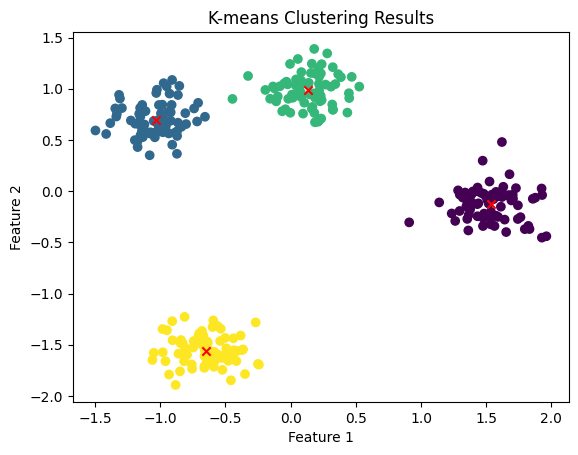

In [8]:



# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

 **K-Medoids**

In [10]:
pip install kmedoids

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.6/454.6 kB 6.7 MB/s eta 0:00:00


In [11]:
from sklearn.preprocessing import StandardScaler
from kmedoids import kmedoids

In [12]:

# Generate sample data
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [13]:

def initialize_medoids(data, k):
    """Randomly initialize the medoids from the data points."""
    medoids_idx = np.random.choice(data.shape[0], k, replace=False)
    medoids = data[medoids_idx]
    return medoids

def compute_dissimilarities(data, medoids):
    """Compute the dissimilarities between each data point and medoids."""
    dissimilarities = np.linalg.norm(data[:, np.newaxis] - medoids, axis=2)
    return dissimilarities

In [14]:
def assign_clusters(dissimilarities):
    """Assign each data point to the closest medoid."""
    return np.argmin(dissimilarities, axis=1)

def update_medoids(data, clusters, k):
    """Update the medoids by selecting the data point with the minimum sum of dissimilarities in each cluster."""
    medoids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return medoids

def k_medoids(data, k, max_iterations=100):
    """Implement the K-medoids clustering algorithm."""
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters

In [15]:


# Choose the number of clusters, K
k = 4

# Run the K-medoids algorithm
final_medoids, cluster_labels = k_medoids(data_scaled, k)

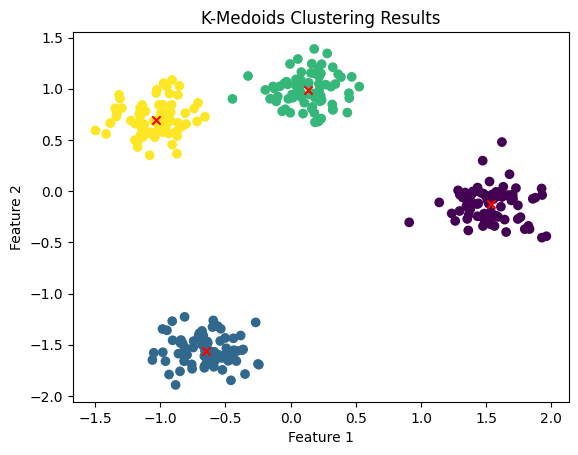

In [16]:







# Visualize the clustering results
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(final_medoids[:, 0], final_medoids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Medoids Clustering Results')
plt.show()